In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!kaggle datasets download -d salader/dogs-vs-cats




The syntax of the command is incorrect.
'mv' is not recognized as an internal or external command,
operable program or batch file.


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown




  0%|          | 0.00/1.06G [00:00<?, ?B/s]
  0%|          | 1.00M/1.06G [00:01<26:22, 722kB/s]
  0%|          | 2.00M/1.06G [00:01<13:18, 1.43MB/s]
  0%|          | 3.00M/1.06G [00:01<08:17, 2.29MB/s]
  0%|          | 5.00M/1.06G [00:01<04:27, 4.25MB/s]
  1%|          | 7.00M/1.06G [00:02<02:54, 6.51MB/s]
  1%|          | 9.00M/1.06G [00:02<02:19, 8.10MB/s]
  1%|          | 12.0M/1.06G [00:02<01:42, 11.0MB/s]
  1%|▏         | 14.0M/1.06G [00:02<01:31, 12.3MB/s]
  1%|▏         | 16.0M/1.06G [00:02<01:25, 13.2MB/s]
  2%|▏         | 18.0M/1.06G [00:02<01:18, 14.3MB/s]
  2%|▏         | 20.0M/1.06G [00:02<01:16, 14.7MB/s]
  2%|▏         | 22.0M/1.06G [00:03<01:11, 15.6MB/s]
  2%|▏         | 24.0M/1.06G [00:03<01:10, 15.7MB/s]
  2%|▏         | 26.0M/1.06G [00:03<01:08, 16.4MB/s]
  3%|▎         | 28.0M/1.06G [00:03<01:08, 16.2MB/s]
  3%|▎         | 30.0M/1.06G [00:03<01:10, 15.8MB/s]
  3%|▎         | 32.0M/1.06G [00:03<01:10, 15.7MB/s]
  3%|▎         | 34.0M/1.06G [00:03<01:08, 16.1MB/s]
  

FileNotFoundError: [Errno 2] No such file or directory: '/content/dogs-vs-cats.zip'

In [6]:
!tar -xf dogs-vs-cats.zip


In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def normalize(image,label):
  image = tf.cast(image/255.00,tf.float32)
  return image,label

In [10]:
train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

In [23]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)


'/content'

In [9]:
model.save('imageClassifier.h5')

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

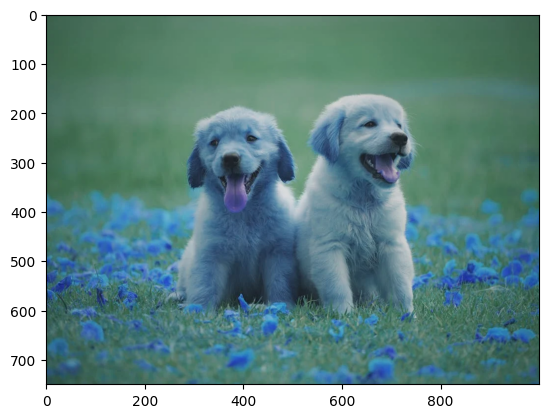

In [22]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread('/content/dog.jpeg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [ ]:
model = Sequential()

conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(256,256,3))
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

conv_base.trainable = False

In [ ]:

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

input_1 = Input(shape=(32,))
hidden1 = Dense(8,activation="relu")(input_1)
hidden2 = Dense(4,activation="relu")(hidden1)

input_2 = Input(shape=(128,))
hidden3 = Dense(64,activation="relu")(input_2)
hidden4 = Dense(32,activation="relu")(hidden3)
hidden5 = Dense(4,activation="relu")(hidden4)

concatenate1 = Concatenate([hidden2,hidden5])

hidden6 = Dense(2,activation="relu")(concatenate1)
output1 = Dense(1,activation="linear")(hidden6)

model = Model(inputs=[input_1,input_2],outputs=output1)

from keras.utils import plot_model
plot_model(model,show_shapes=True)





In [ ]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten
from keras.utils import pad_sequences

(X_train,y_train),(X_test,y_test) = imdb.load_data()

X_train = pad_sequences(X_train,padding='post')
X_test = pad_sequences(X_test,padding='post')

length = len(X_train[0])

model = Sequential()

model.add(SimpleRNN(32,input_shape=(length,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))